In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
tf.set_random_seed(1)
np.random.seed(1)

In [3]:
BATCH_SIZE = 50
LR = 0.001
TIME_STEP = 28 
INPUT_SIZE = 28

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


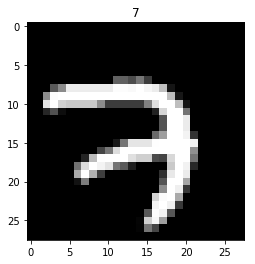

In [4]:
mnist = input_data.read_data_sets('./mnist', one_hot=True)
test_x = mnist.test.images[:2000]
test_y = mnist.test.labels[:2000]
plt.imshow(mnist.train.images[0].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[0]))
plt.show()

In [5]:
tf_x = tf.placeholder(tf.float32, [None, TIME_STEP * INPUT_SIZE])
image = tf.reshape(tf_x, [-1, TIME_STEP, INPUT_SIZE])
tf_y = tf.placeholder(tf.int32, [None, 10])

In [6]:
rnn_cell = tf.contrib.rnn.BasicLSTMCell(num_units=64)
outputs, (h_c, h_n) = tf.nn.dynamic_rnn(
    rnn_cell,
    image,
    initial_state=None,
    dtype=tf.float32,
    time_major=False,
)
output = tf.layers.dense(outputs[:, -1, :], 10)

In [7]:
loss = tf.losses.softmax_cross_entropy(onehot_labels=tf_y, logits=output)
train_op = tf.train.AdamOptimizer(LR).minimize(loss)
accuracy = tf.metrics.accuracy(labels=tf.argmax(tf_y, axis=1), predictions=tf.argmax(output, axis=1),)[1]

In [8]:
with tf.Session() as sess:
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    for step in range(1200):
        b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
        _, loss_ = sess.run([train_op, loss], {tf_x: b_x, tf_y: b_y})
        if step % 100 == 0:
            accuracy_ = sess.run(accuracy, {tf_x: test_x, tf_y: test_y})
            print('train loss: %.4f' % loss_, '| test accuracy: %.2f' % accuracy_)

    test_output = sess.run(output, {tf_x: test_x[:10]})
    pred_y = np.argmax(test_output, 1)
    print(pred_y, 'prediction number')
    print(np.argmax(test_y[:10], 1), 'real number')

train loss: 2.2685 | test accuracy: 0.14
train loss: 1.3562 | test accuracy: 0.37
train loss: 0.8494 | test accuracy: 0.49
train loss: 0.3012 | test accuracy: 0.57
train loss: 0.4149 | test accuracy: 0.62
train loss: 0.4915 | test accuracy: 0.66
train loss: 0.3908 | test accuracy: 0.70
train loss: 0.2395 | test accuracy: 0.72
train loss: 0.3526 | test accuracy: 0.74
train loss: 0.3713 | test accuracy: 0.76
train loss: 0.2958 | test accuracy: 0.77
train loss: 0.1593 | test accuracy: 0.78
[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
